In [1]:
import numpy as np
import matplotlib
import pandas as pd
from pathlib import Path
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

Load the results of the last simulation run 

In [2]:
sim_results_file = '_lastrun.csv'
sim_results_path = Path('..', 'sim_results', sim_results_file)
results = pd.read_csv(sim_results_path, quotechar="'")
results.head()

,n,m,seed,cputime,iterations,solver,par,lb,ub,gd_sol
0,10,1,2,0.248102,2,<class 'bnb.fml_solver.FMLSolver'>,"{""a"": [[-6.637032754409521, 0.695274690301928,...",318.746138,320.125756,318.746138
1,20,1,3,0.484627,4,<class 'bnb.fml_solver.FMLSolver'>,"{""a"": [[2.914069516653468, -2.9273336552187796...",667.630925,669.870125,667.630925
2,30,1,4,0.492847,4,<class 'bnb.fml_solver.FMLSolver'>,"{""a"": [[0.6612514884601124, 6.61758103950838, ...",1731.534467,1742.560088,1730.958360
3,40,1,5,0.481532,4,<class 'bnb.fml_solver.FMLSolver'>,"{""a"": [[5.19025228648327, -4.10593182524803, 5...",3114.673805,3132.535633,3114.673805
4,50,1,6,0.484651,4,<class 'bnb.fml_solver.FMLSolver'>,"{""a"": [[-2.3522827257835193, 4.497207722809644...",3253.888165,3274.185990,3253.749236


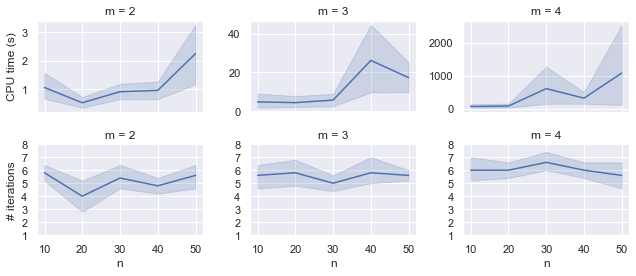

/Users/rvdgeer/.pyenv/versions/3.6.8/envs/ms-fml/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rvdgeer/.pyenv/versions/3.6.8/envs/ms-fml/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rvdgeer/.pyenv/versions/3.6.8/envs/ms-fml/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


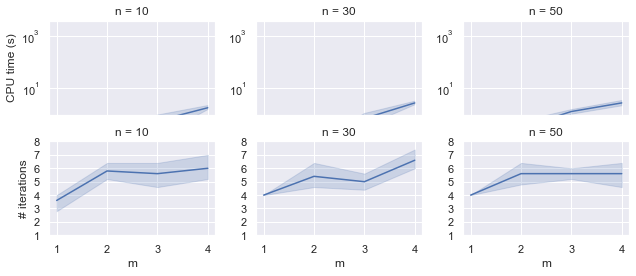

In [3]:
for x_variable, columns_variable in (('n', 'm'), ('m', 'n')):
    
    columns = [10, 30, 50] if columns_variable == 'n' else [2, 3, 4]
    
    _, axs = plt.subplots(
        figsize=(len(columns) * 3, 4),
        nrows=2,
        ncols=len(columns),
        sharex=True,
    )
    
    min_y_tick_iters = int(results['iterations'].min()) - 1
    max_y_tick_iters = int(results['iterations'].max()) + 1
    y_ticks_iters = np.arange(min_y_tick_iters, max_y_tick_iters)
    y_lim_cpu = results['cputime'].min(), results['cputime'].max()
    x_ticks = results[x_variable].unique()

    label_mapping = {'cputime': 'CPU time (s)', 'iterations': '# iterations'}

    for i, (var_to_plot, label) in enumerate(label_mapping.items()):
        for column, ax in zip(columns, axs[i]):
            ax.set_xticks(x_ticks)
            results_ = results[lambda df: df[columns_variable].eq(column)]
            
            if x_variable == 'm' and var_to_plot == 'cputime':
                ax.set(yscale="log")
                ax.set_ylim(y_lim_cpu)
                
            sns.lineplot(data=results_, x=x_variable, y=var_to_plot, ax=ax, ci=95)

            if ax is axs[i][0]:
                ax.set_ylabel(label)
            else:
                ax.set_ylabel('')
            ax.set_title(f'{columns_variable} = {column}')

            if var_to_plot == 'iterations':
                ax.set_yticks(y_ticks_iters)
                
    plt.tight_layout()
    plt.savefig(f'../figs/runtime_in_{x_variable}.pdf')
    plt.show()